# Machine Learning Project - Consumer Complaint Database

## Introduction

### Input Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

complaints_source_df = pd.read_csv('../data/complaints.csv', delimiter=',')
complaints_source_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


## Research Question

**"Kunnen we de reactie op een gegeven klacht gaan voorspellen?"**

### Specification

- Predictors: Product, Consumer complaint narrative, Company
- Target: Company response to consumer
- Sampling rate (training/validation/testing): 55/25/20

## Exploratory Data Analysis & Pre-processing

In [3]:
complaints_df = complaints_source_df[['Product', 'Consumer complaint narrative', 'Company', 'Company response to consumer']].copy()
complaints_df.columns = ['Product', 'Narrative', 'Company', 'Response'] 
complaints_df.head()

,Product,Narrative,Company,Response
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...,Experian Information Solutions Inc.,Closed with explanation
1,Debt collection,please review the current fraud account and al...,"Ideal Collection Services, Inc.",Closed with explanation
2,Debt collection,Called multiple times over the years for a deb...,"ONEMAIN FINANCIAL HOLDINGS, LLC.",Closed with explanation
3,Debt collection,I sent in a letter to the company to have them...,"Diversified Consultants, Inc.",Closed with explanation
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...,"ClearOne Advantage, LLC",Closed with explanation


#### Product

In [4]:
complaints_df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

Aantal product categorieën: 13


<Figure size 720x360 with 0 Axes>

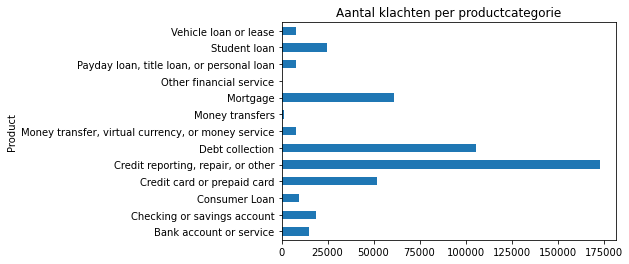

In [5]:
product_count = len(complaints_df.Product.unique())
print('Aantal product categorieën:', product_count)
product_counts = pd.DataFrame({'Count': complaints_df.groupby(['Product']).size()})
fig = plt.figure(figsize=(10, 5))
product_counts.plot.barh(title="Aantal klachten per productcategorie", legend=None)

#### Consumer complaint narrative

In [11]:
# pip install nltk

import nltk, re
nltk.download('wordnet')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

def processing(string):
    string = string.lower()
    string = re.sub(r'[^\w\s]', '', string)
    string = re.sub(r'[0-9]|,', '', string)
    string = string.replace('\r', ' ')
    string = string.replace('\n', ' ')
    string = re.sub(r'[X|x]{2,}', ' ', string)
    tokens = string.split(' ')
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS and len(w) > 3]
    result = [SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(token, pos='v')) for token in tokens]
    return ' ' . join(result)

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# pip install swifter

In [12]:
%%time

import swifter

complaints_df['Narrative_Processed'] = complaints_df['Narrative'].swifter.apply(processing)


CPU times: user 16min 58s, sys: 8.97 s, total: 17min 7s
Wall time: 17min 2s


In [10]:
complaints_df[['Narrative','Narrative_Processed']].head()

,Narrative,Narrative_Processed
0,I have complained many times that the credit r...,complain time credit report experian inaccur j...
1,please review the current fraud account and al...,review current fraud account fraudul inquir
2,Called multiple times over the years for a deb...,call multipl time year debt occur previous mar...
3,I sent in a letter to the company to have them...,send letter compani valid debt special attach ...
4,On XX/XX/19 I applied for a Debt Relief Produc...,appli debt relief product account execut expla...


#### Company

In [14]:
company_count = len(complaints_df.Company.unique())
print('Aantal bedrijven:', company_count)

Aantal bedrijven: 4419


#### Response

Aantal responsen: 7


<Figure size 720x360 with 0 Axes>

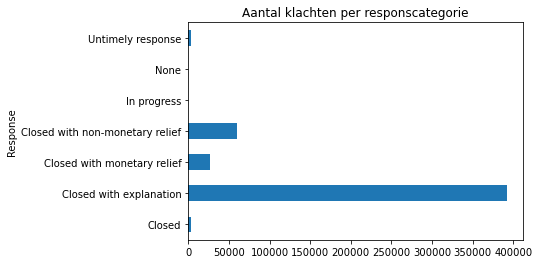

In [15]:
response_count = len(complaints_df.Response.unique())
print('Aantal responsen:', response_count)
response_counts = pd.DataFrame({'Count': complaints_df.groupby(['Response']).size()})
fig = plt.figure(figsize=(10, 5))
response_counts.plot.barh(title="Aantal klachten per responscategorie", legend=None)

## Feature Extraction

### Sentiment Analysis

sentiment bepalen van de narrative en toevoegen aan de dataset zodat deze gebruikt kan worden als invoer parameter voor het model

In [63]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(sublinear_tf=True, min_df=5)

X = tfidfVector.fit_transform(complaints_df['Narrative_Processed']) # returns document-term matrix (sparse matrix)

CPU times: user 30.4 s, sys: 972 ms, total: 31.3 s
Wall time: 31.3 s


TODO


- overzicht van de sentiment verdeling per product categorie weergeven
    - inzicht geven door per voorbeelden per sentiment bij elke categorie een klacht weer te geven

### Determine distance for categorical features

TODO

assets linken aan bedrijf en toevoegen aan de dataset (bedrijven quantificeren op basis van aantal assets), 
dit normalizeren zodat distance tussen verschillende bedrijven berekend kan worden, deze value kan ook als invoer parameter voor het model gebruikt worden

## Classificiation Experiments

TODO

- cascading classifiers toepassen bij model
    - grootste groep van respons (closed with explanation) afzonderlijk bepalen
    - vervolgens de andere groepen in rekening brengen
    - eventueel dataset verder balanceren op basis van target group verdeling
- classifiers test experimenten uitvoeren (Naive Bayes, Decision Tree/Random Forest, SVM, NN)
    - inzicht geven van verdelingen bij zowel train/test sets
    - confusion matrix met concrete voorbeelden van correct geclassificeerde klachten

## Conclusion